# Introduction

## Problem

In the main page select the "+" sign

<img src="./images/main.png" alt="main" width="200px"/>

Then select "add food"

<img src="./images/add_food.png" alt="main" width="200px"/>

Here I search for two different products and I find there are too many variations of a single product with similar nutritions in the app (almost 50 different variation for marble cheese and 50 for chicken thighs). Examples below:

### Marble cheese:

| ![alt text](./images/cheese1.png "Title") | ![alt text](./images/cheese2.png "Title") | ![alt text](./images/cheese3.png "Title") | ![alt text](./images/cheese4.png "Title") |
| --- | --- | --- | --- |

### Chicken thighs:

| ![alt text](./images/chicken1.png "Title") | ![alt text](./images/chicken2.png "Title") | ![alt text](./images/chicken3.png "Title") | ![alt text](./images/chicken4.png "Title") |
| --- | --- | --- | --- |

This overwhelms the user.

## Discussion

### Suggested approach

We can cluster products based on their nutritions such that products with similar and close enough nutrition facts on their label belong to same category. This opens the opportunity for a hierarchical search which can show the information at multiple steps in a coarse to fine manner and can possibly prevent the problem of overwhelming the user with too much information early on.

In order to demosntrate this we use the OpenFoodFacts dataset available at https://world.openfoodfacts.org/data


# Explore the dataset

Let's start by looking at the few initial rows of the dataset and see what each column represents

In [1]:
import pandas as pd

food = pd.read_csv("en.openfoodfacts.org.products.tsv", delimiter='\t', encoding='utf-8')

C:\Users\clbam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
food.head()

code                                                url  \
0   3087  http://world-en.openfoodfacts.org/product/0000...   
1   4530  http://world-en.openfoodfacts.org/product/0000...   
2   4559  http://world-en.openfoodfacts.org/product/0000...   
3  16087  http://world-en.openfoodfacts.org/product/0000...   
4  16094  http://world-en.openfoodfacts.org/product/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity  ... fruits-vegetables-nuts_100g  \
0          NaN      1kg  ...                         NaN   
1          NaN      NaN  ...                         NaN   
2          NaN      NaN  ...                         NaN   
3          NaN      NaN  ...                         NaN   
4          NaN      NaN  ...                         NaN   

  fruits-vegetables-nuts-estimate_100g collagen-meat-protein-ratio_100g  \
0                                  NaN                              NaN   
1                                  NaN                              NaN   
2                                  NaN                              NaN   
3                                  NaN                              NaN   
4                                  NaN                              NaN   

  cocoa_100g chlorophyl_100g carbon-footprint_100g nutrition-score-fr_100g  \
0        NaN             NaN                   NaN                     NaN   
1        NaN             NaN                   NaN                    14.0   
2        NaN             NaN                   NaN                     0.0   
3        NaN             NaN                   NaN                    12.0   
4        NaN             NaN                   NaN                     NaN   

  nutrition-score-uk_100g glycemic-index_100g water-hardness_100g  
0                     NaN                 NaN                 NaN  
1                    14.0                 NaN                 NaN  
2                     0.0                 NaN                 NaN  
3                    12.0                 NaN                 NaN  
4                     NaN                 NaN                 NaN  

[5 rows x 163 columns]

In [3]:
food.describe()

no_nutriments    additives_n  ingredients_from_palm_oil_n  \
count            0.0  283867.000000                283867.000000   
mean             NaN       1.876851                     0.023430   
std              NaN       2.501022                     0.153094   
min              NaN       0.000000                     0.000000   
25%              NaN       0.000000                     0.000000   
50%              NaN       1.000000                     0.000000   
75%              NaN       3.000000                     0.000000   
max              NaN      30.000000                     2.000000   

       ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
count                        0.0                            283867.000000   
mean                         NaN                                 0.059736   
std                          NaN                                 0.280660   
min                          NaN                                 0.000000   
25%                          NaN                                 0.000000   
50%                          NaN                                 0.000000   
75%                          NaN                                 0.000000   
max                          NaN                                 6.000000   

       ingredients_that_may_be_from_palm_oil  nutrition_grade_uk  \
count                                    0.0                 0.0   
mean                                     NaN                 NaN   
std                                      NaN                 NaN   
min                                      NaN                 NaN   
25%                                      NaN                 NaN   
50%                                      NaN                 NaN   
75%                                      NaN                 NaN   
max                                      NaN                 NaN   

         energy_100g  energy-from-fat_100g      fat_100g  ...  \
count  295367.000000            869.000000  2.794970e+05  ...   
mean     1125.453320            587.216617  5.606587e+04  ...   
std       936.825952            713.255708  2.963385e+07  ...   
min         0.000000              0.000000  0.000000e+00  ...   
25%       382.000000             49.400000  1.000000e-01  ...   
50%      1092.000000            300.000000  5.290000e+00  ...   
75%      1674.000000            900.000000  2.000000e+01  ...   
max    231199.000000           3830.000000  1.566667e+10  ...   

       fruits-vegetables-nuts_100g  fruits-vegetables-nuts-estimate_100g  \
count                  3228.000000                            404.000000   
mean                     33.392680                             60.360124   
std                      32.906834                             29.262350   
min                       0.000000                              0.000000   
25%                       0.000000                             45.000000   
50%                      25.000000                             58.000000   
75%                      55.000000                             93.000000   
max                     100.000000                            100.000000   

       collagen-meat-protein-ratio_100g   cocoa_100g  chlorophyl_100g  \
count                        182.000000  1383.000000              0.0   
mean                          15.362637    52.102675              NaN   
std                            3.692658    19.028361              NaN   
min                            8.000000     6.000000              NaN   
25%                           12.000000    33.000000              NaN   
50%                           15.000000    52.000000              NaN   
75%                           15.000000    70.000000              NaN   
max                           25.000000   100.000000              NaN   

       carbon-footprint_100g  nutrition-score-fr_100g  \
count             278.000000            254856.000000   
mean              335.790664                

## Let's see how many missing values we have in dataset

Text(0.5, 1.0, 'Proportion of NaNs in each column')

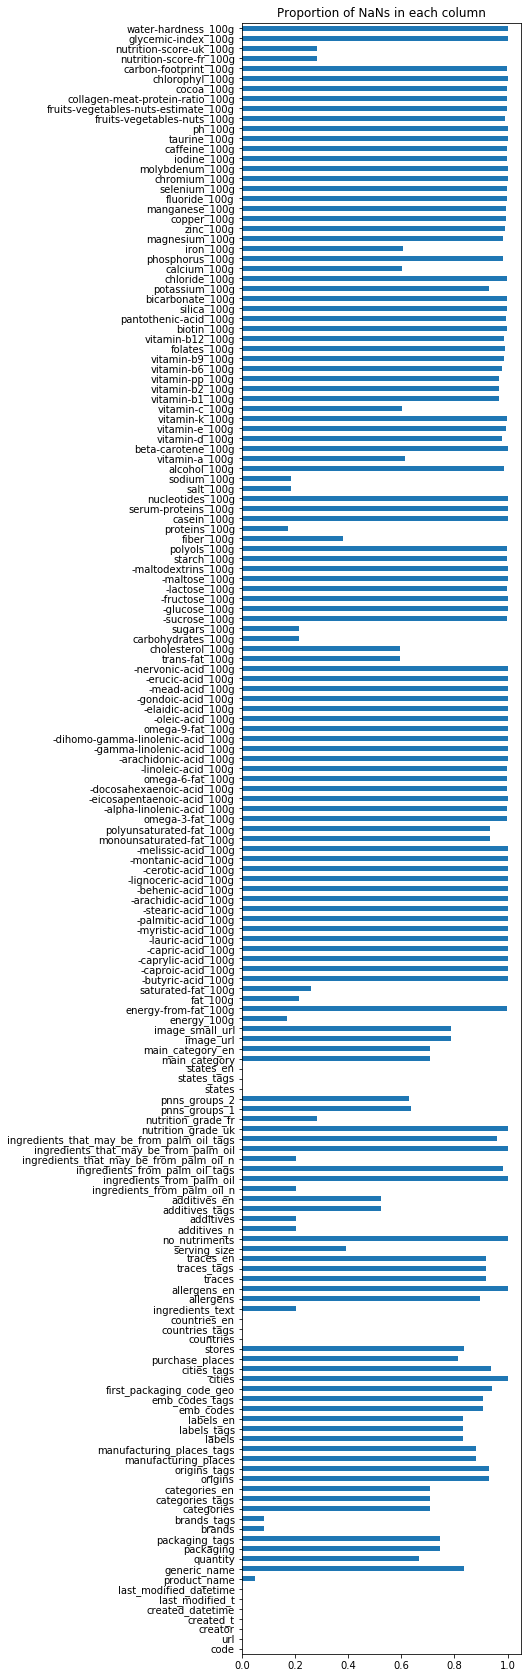

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn

plt.figure(figsize=(5, 30))
food.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs in each column")

### What features do we have?

In [5]:
print(food.shape)
food.product_name = food.product_name.astype(str)
print(food.columns.values)
print(food["nutrition-score-fr_100g"].isnull().value_counts())

(356027, 163)
['code' 'url' 'creator' 'created_t' 'created_datetime' 'last_modified_t'
 'last_modified_datetime' 'product_name' 'generic_name' 'quantity'
 'packaging' 'packaging_tags' 'brands' 'brands_tags' 'categories'
 'categories_tags' 'categories_en' 'origins' 'origins_tags'
 'manufacturing_places' 'manufacturing_places_tags' 'labels' 'labels_tags'
 'labels_en' 'emb_codes' 'emb_codes_tags' 'first_packaging_code_geo'
 'cities' 'cities_tags' 'purchase_places' 'stores' 'countries'
 'countries_tags' 'countries_en' 'ingredients_text' 'allergens'
 'allergens_en' 'traces' 'traces_tags' 'traces_en' 'serving_size'
 'no_nutriments' 'additives_n' 'additives' 'additives_tags' 'additives_en'
 'ingredients_from_palm_oil_n' 'ingredients_from_palm_oil'
 'ingredients_from_palm_oil_tags'
 'ingredients_that_may_be_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil'
 'ingredients_that_may_be_from_palm_oil_tags' 'nutrition_grade_uk'
 'nutrition_grade_fr' 'pnns_groups_1' 'pnns_groups_2' 'states'
 

# Preprocess dataset

In this section we will clean the dataset to make it ready for our clustering algorithm. In order to do that we only pick columns that can best represent the nutritional facts of a product. Plus, we are going to remove any row that has at least one NaN feature, so our dataset is clean of any missing  value.

In [6]:
nutrition_table_cols = ["energy_100g", "fat_100g", "carbohydrates_100g", "sugars_100g", "proteins_100g", "salt_100g"]
nutrition_table = food[nutrition_table_cols].copy()

nutrition_table["isempty"] = np.where(nutrition_table.isnull().sum(axis=1) >= 1, 1, 0)
percentage = nutrition_table.isempty.value_counts()[1] / nutrition_table.shape[0] * 100
print("Percentage of incomplete tables: " + str(percentage))

nutrition_table = nutrition_table[nutrition_table.isempty==0].copy()
print(nutrition_table.isnull().sum())

nutrition_table.drop("isempty", inplace=True,axis=1)
nutrition_table.dropna(axis = 0, how = "any", inplace=True)
print(nutrition_table.shape)

Percentage of incomplete tables: 26.88307347476455
energy_100g           0
fat_100g              0
carbohydrates_100g    0
sugars_100g           0
proteins_100g         0
salt_100g             0
isempty               0
dtype: int64
(260316, 6)


In the next step we add some useful features to the dataset and then we remove rows with obvious errors such as negative number for a nutrition and etc.

In [7]:
nutrition_table["g_sum"] = nutrition_table.fat_100g + nutrition_table.carbohydrates_100g + nutrition_table.proteins_100g + nutrition_table.salt_100g
nutrition_table["g_sum"] = round(nutrition_table.g_sum)
nutrition_table["other_carbs"] = nutrition_table.carbohydrates_100g - nutrition_table.sugars_100g

nutrition_table.columns

Index(['energy_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'g_sum', 'other_carbs'],
      dtype='object')

## How do nutiriton facts correlate with each other?

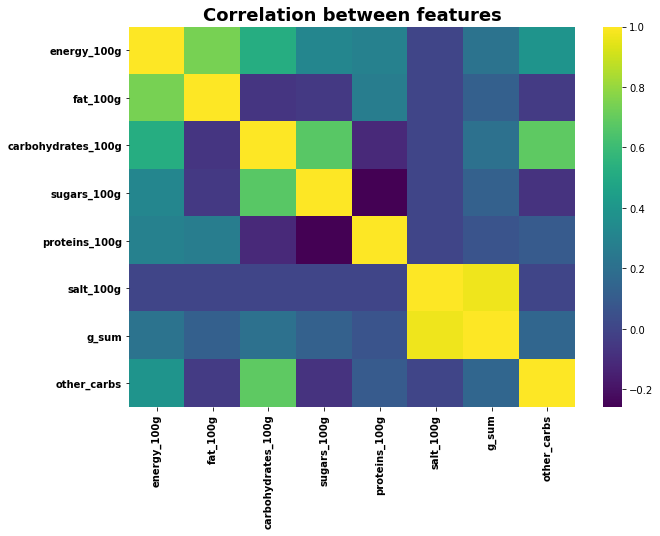

In [8]:
import seaborn as sns

nutrition_table_corr=nutrition_table.corr()
f,ax=plt.subplots(figsize=(10,7))
sns.heatmap(nutrition_table_corr, cmap='viridis')
plt.title("Correlation between features", 
          weight='bold', 
          fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.show()

In [9]:
for col in nutrition_table.columns:
    if col not in ["energy_100g"]:
        nutrition_table = nutrition_table.loc[nutrition_table[col] <= 100]
    nutrition_table = nutrition_table.loc[nutrition_table[col] >= 0]

# make sure nutirtion fact values in the products makes sense
nutrition_table = nutrition_table.loc[nutrition_table.energy_100g <= 3700]
nutrition_table = nutrition_table.loc[nutrition_table.carbohydrates_100g >= nutrition_table.sugars_100g]
nutrition_table = nutrition_table.loc[nutrition_table.g_sum <= 100]
nutrition_table.head()

energy_100g  fat_100g  carbohydrates_100g  sugars_100g  proteins_100g  \
1        2243.0     28.57               64.29        14.29           3.57   
2        1941.0     17.86               60.71        17.86          17.86   
3        2540.0     57.14               17.86         3.57          17.86   
7        1833.0     18.75               57.81        15.62          14.06   
12       2230.0     36.67               36.67         3.33          16.67   

    salt_100g  g_sum  other_carbs  
1     0.00000   96.0        50.00  
2     0.63500   97.0        42.85  
3     1.22428   94.0        14.29  
7     0.13970   91.0        42.19  
12    1.60782   92.0        33.34

Then we transform the features and plot their distribution

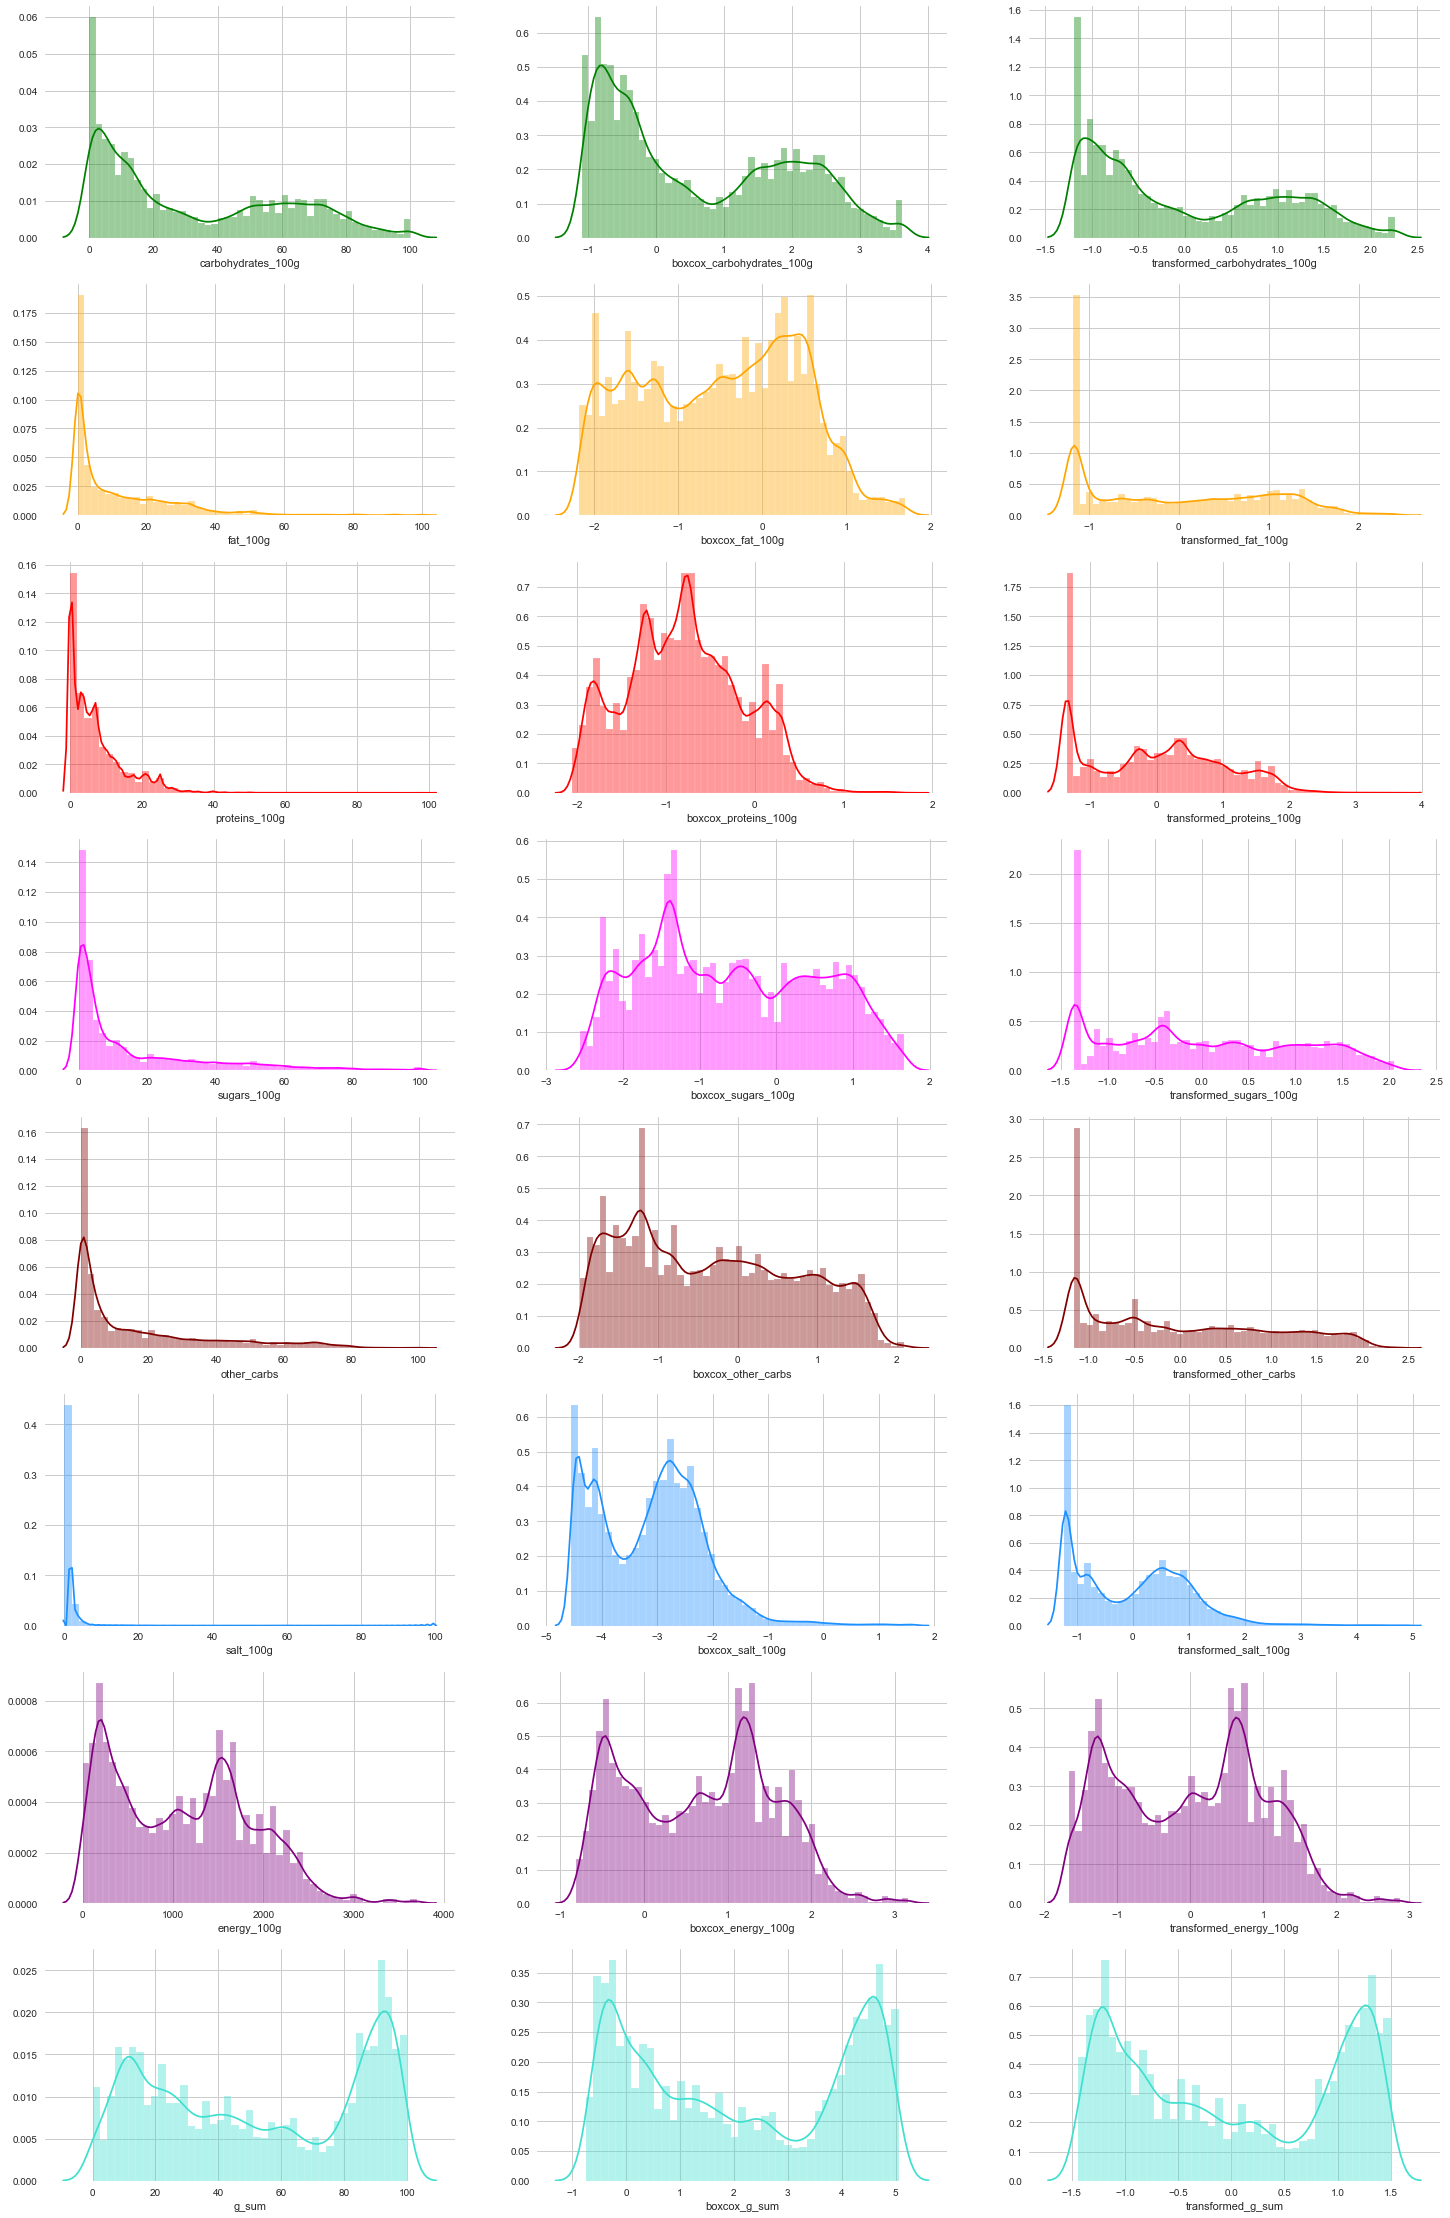

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

from scipy.stats import boxcox


class TransformParameter:
 
    def __init__(self, const, lam, color="Dodgerblue"):
        self.const = const
        self.lam = lam
        self.color = color

def transform(data, feature, constant, lam):
    scaler = MinMaxScaler((0,5))
    scaled_feature = scaler.fit_transform(data[feature].values.copy().reshape(-1,1)).flatten()
#     print(scaled_feature.shape)
    data["boxcox_" + feature] = boxcox(scaled_feature + constant, lam)
    scaler = StandardScaler()
    data["transformed_" + feature] = scaler.fit_transform(data["boxcox_" + feature].values.reshape(-1,1))
    return data

constants = {"carbohydrates_100g": TransformParameter(const=0.01, lam=0.9, color="Green"),
            "fat_100g" : TransformParameter(const=0.1, lam=0.05, color="orange"),
            "proteins_100g": TransformParameter(const=0.1, lam=0.1, color="Red"),
             "sugars_100g" : TransformParameter(const=0.07, lam=0.03, color="Fuchsia"),
            "other_carbs" : TransformParameter(const=0.05, lam=0.3, color="maroon"),
            "salt_100g" : TransformParameter(const=0.01, lam=0.005, color="Dodgerblue"),
            "energy_100g" : TransformParameter(const=0.3, lam=0.7, color="Purple"),
            "g_sum": TransformParameter(const=0.1, lam=1.2, color="turquoise")}
for key in constants.keys():
    transform(data=nutrition_table,
              feature=key,
              constant=constants[key].const,
              lam=constants[key].lam)

fig, ax = plt.subplots(8,3,figsize=(25,40))
n = 0
for feature in constants.keys():
    sns.distplot(nutrition_table[feature],
                 ax=ax[n,0],
                 color=constants[feature].color)
    sns.distplot(nutrition_table[nutrition_table[feature]>0]["boxcox_" + feature],
                 ax=ax[n,1],
                 color=constants[feature].color)
    sns.distplot(nutrition_table["transformed_" + feature],
                 ax=ax[n,2],
                 color=constants[feature].color)
    n+=1

In [11]:
nutrition_table, test_table = train_test_split(nutrition_table, test_size=0.3, random_state=0)
features = ["transformed_carbohydrates_100g",
            "transformed_fat_100g",
            "transformed_proteins_100g",
            "transformed_sugars_100g",
            "transformed_salt_100g",
            "transformed_other_carbs",
            "transformed_energy_100g",
            "transformed_g_sum"]
X_train = nutrition_table[features].values
X_test = test_table[features].values
print("Number of train samples: " + str(X_train.shape[0]))

Number of train samples: 179249


In [12]:
nutrition_table

energy_100g  fat_100g  carbohydrates_100g  sugars_100g  proteins_100g  \
153868       1494.0      0.00               71.43         0.00          14.29   
303807       1937.0     16.00               69.00        68.00           7.60   
327396       1732.0     18.00               57.00        30.00           5.00   
241099       1166.0     16.00               27.00        20.00           5.40   
100829       1046.0     21.43               14.29         3.57           7.14   
...             ...       ...                 ...          ...            ...   
214972       1386.0     32.00                4.20         2.30           7.70   
135595        138.0      0.00                6.67         3.33           0.00   
210154       1236.0      3.60                4.90         0.40          43.00   
49275        1046.0     16.67               16.67        16.67           0.00   
249997        607.0     12.00                6.40         4.00           2.80   

        salt_100g  g_sum  other_carbs  boxcox_carbohydrates_100g  \
153868    2.35966   88.0        71.43                   2.391694   
303807    0.01000   93.0         1.00                   2.284563   
327396    0.60000   81.0        27.00                   1.749685   
241099    0.12000   49.0         7.00                   0.354243   
100829    1.04394   44.0        10.72                  -0.279746   
...           ...    ...          ...                        ...   
214972    1.53000   45.0         1.90                  -0.826706   
135595    1.60782    8.0         3.34                  -0.686402   
210154    1.70000   53.0         4.50                  -0.786290   
49275     0.00000   33.0         0.00                  -0.157801   
249997    0.11000   21.0         2.40                  -0.701454   

        transformed_carbohydrates_100g  ...  boxcox_sugars_100g  \
153868                        1.356369  ...           -2.555951   
303807                        1.278079  ...            1.267665   
327396                        0.887198  ...            0.454141   
241099                       -0.132572  ...            0.067727   
100829                       -0.595882  ...           -1.363635   
...                                ...  ...                 ...   
214972                       -0.995593  ...           -1.645401   
135595                       -0.893061  ...           -1.411070   
210154                       -0.966058  ...           -2.323030   
49275                        -0.506767  ...           -0.101325   
249997                       -0.904061  ...           -1.283951   

        transformed_sugars_100g  boxcox_other_carbs  transformed_other_carbs  \
153868                -1.354064            1.570608                 1.910745   
303807                 1.733754           -1.662709                -0.892931   
327396                 1.076781            0.354040                 0.855834   
241099                 0.764726           -0.801141                -0.145847   
100829                -0.391192           -0.493793                 0.120660   
...                         ...                 ...                      ...   
214972                -0.618736           -1.465711                -0.722110   
135595                -0.429498           -1.225595                -0.513901   
210154                -1.165965           -1.070365                -0.379297   
49275                  0.628206           -1.976365                -1.164908   
249997                -0.326842           -1.374428                -0.642957   

        boxcox_salt_100g  transformed_salt_100g  boxcox_energy_100g  \
153868         -2.045328               1.242578            1.145389   
303807         -4.504870              -1.185143            1.594279   
327396         -3.193111               0.109644            1.390376   
241099         -4.092711              -0.778316            0.790199   
100829         -2.758252               0.538877            0.654112   
...                  ...  

## Let's apply GMM (Gaussian Mixture Model) to cluster the prdocuts

### GMM doesn't perfrom hard assigning to clusters as opposed to KMeans. It gives us a probabilistic distribution which in the case of food products is nice to have (one food can belong to multiple categories).

In [13]:
components = 20

model = GaussianMixture(n_components=components,
                        covariance_type="full",
                        random_state=1,
                        n_init=1,
                        max_iter=200,
                        init_params="kmeans")
model.fit(X_train)
print("Model converged: " + str(model.converged_))

nutrition_table["cluster"] = model.predict(X_train)
test_table["cluster"] = model.predict(X_test)

Model converged: True


In [14]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

plot_features = ["transformed_carbohydrates_100g", "transformed_proteins_100g", "transformed_fat_100g"]
nutrition_table["product"] = food.loc[nutrition_table.index, "product_name"]
N = 10000

trace1 = go.Scatter3d(
    x=nutrition_table[plot_features[0]].values[0:N], 
    y=nutrition_table[plot_features[1]].values[0:N],
    z=nutrition_table[plot_features[2]].values[0:N],
    mode='markers',
    text=nutrition_table["product"].values[0:N],
    marker=dict(
        color=nutrition_table.cluster.values,
        colorscale = "Jet",
        opacity=0.3,
        size=4
    )
)

figure_data = [trace1]
layout = go.Layout(
    title = 'Clustering results',
    scene = dict(
        xaxis = dict(title=plot_features[0]),
        yaxis = dict(title=plot_features[1]),
        zaxis = dict(title=plot_features[2]),
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    showlegend=True
)

fig = go.Figure(data=figure_data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

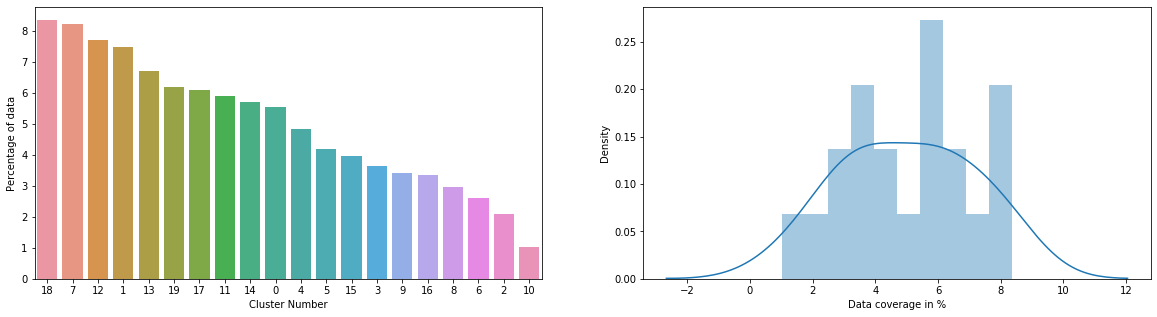

In [15]:
cluster_count = nutrition_table.cluster.value_counts()

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=cluster_count.index,
            y=cluster_count.values / nutrition_table.shape[0] * 100,
            order=cluster_count.index, ax=ax[0])
ax[0].set_xlabel("Cluster Number")
ax[0].set_ylabel("Percentage of data")
sns.distplot(cluster_count.values / nutrition_table.shape[0] * 100, bins=10, ax=ax[1])
ax[1].set_xlabel("Data coverage in %")
ax[1].set_ylabel("Density");

## What kind of products do we have in each cluster?

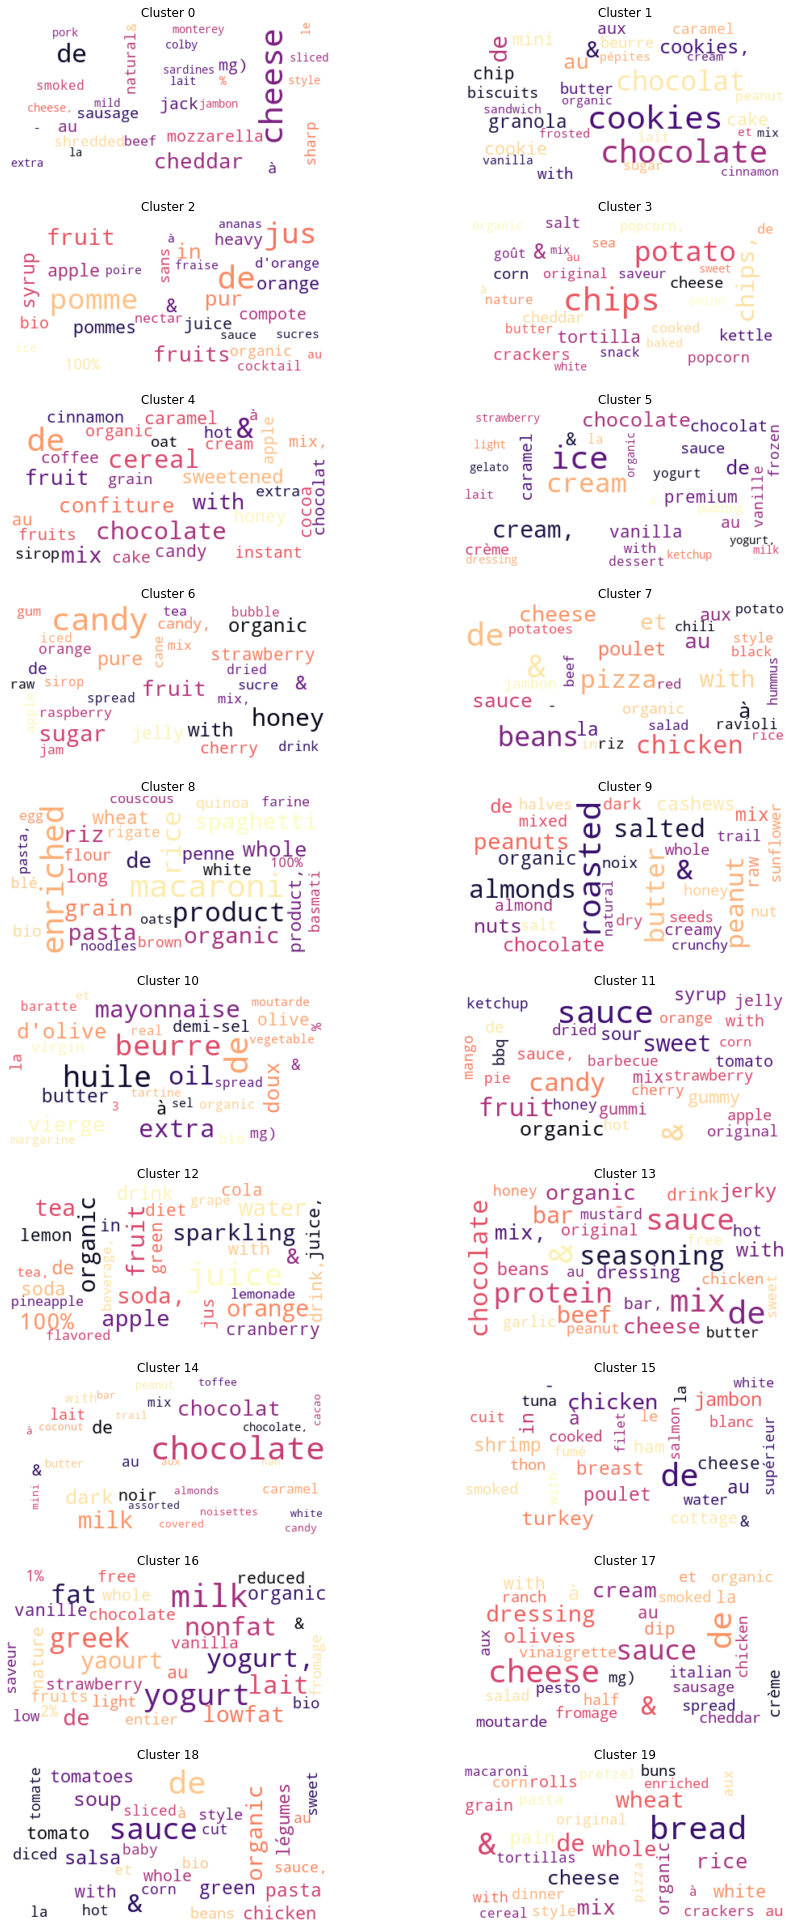

In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def make_word_cloud(data, cluster, subplotax, title):
    words = data[data.cluster==cluster]["product"].apply(lambda l: l.lower().split())
    cluster_words=words.apply(pd.Series).stack().reset_index(drop=True)
    frequencies = cluster_words.value_counts()
    
    text = " ".join(w for w in cluster_words)

    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=40, max_words=30,
                          background_color="white", colormap="magma")
    wordcloud.generate_from_frequencies(frequencies)
    # Display the generated image:
    subplotax.imshow(wordcloud, interpolation='bilinear')
    subplotax.axis("off")
    subplotax.set_title(title)
    return subplotax

nutrition_table["product"] = food.loc[nutrition_table.index, "product_name"]

fig, ax = plt.subplots(10,2, figsize=(15,35))
for m in range(10):
    for n in range(2):
        cluster = m*2+ n
        title = "Cluster " + str(cluster) 
        make_word_cloud(nutrition_table, cluster, ax[m,n], title)

## Let's see what's the distribution like in the "nuts" category (cluster 9)

In [23]:
nutrition_table[nutrition_table["cluster"]==9]["product"].value_counts().head(20)

Creamy Peanut Butter        100
Almonds                      58
Mixed Nuts                   58
Crunchy Peanut Butter        51
nan                          43
Peanut Butter                41
Dry Roasted Peanuts          40
Peanuts                      31
Sliced Almonds               30
Deluxe Mixed Nuts            30
Honey Roasted Peanuts        29
Raw Almonds                  28
Roasted & Salted Almonds     21
Pistachios                   21
Pecan Halves                 20
Chopped Walnuts              18
Trail Mix                    18
Shelled Walnuts              18
Cashews                      17
Cashews Halves & Pieces      16
Name: product, dtype: int64

## Nut (cluster 9) vs Snack (cluster 4) nutrition comparison

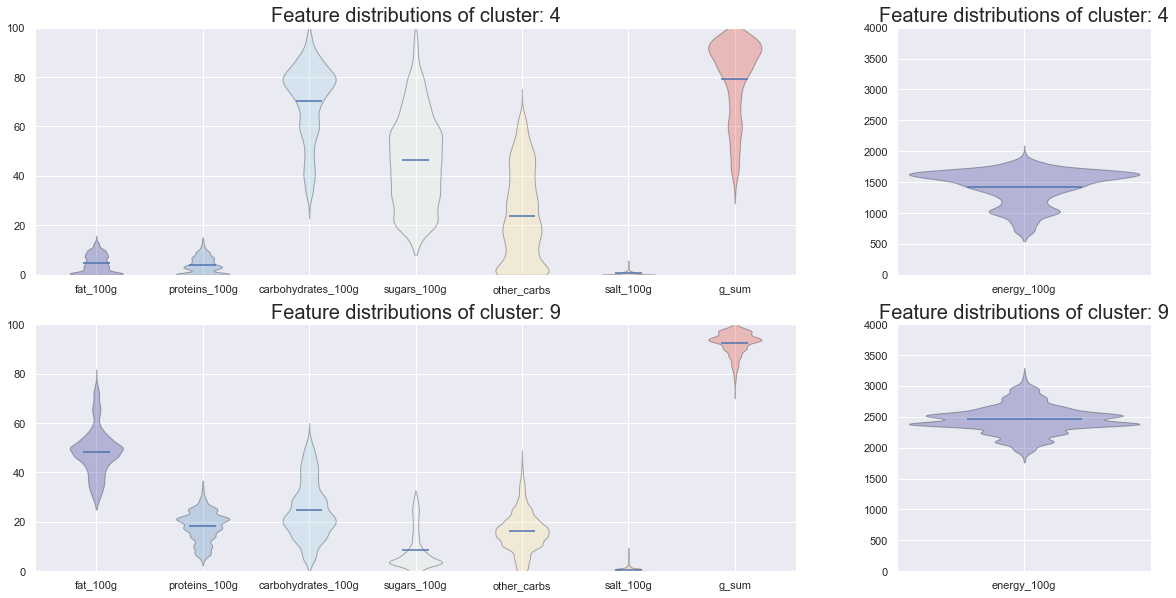

In [22]:
def make_violin(subax, cluster, nutrients):
    pos = np.arange(1, len(nutrients)+1)
    part = subax.violinplot(
            nutrition_table[nutrition_table.cluster==cluster]
                [nutrients].values,
            showmeans=True,
            showextrema=False)
    subax.set_title("Feature distributions of cluster: " + str(cluster), size = 20)
    subax.set_xticks(pos)
    subax.set_xticklabels(nutrients)
    set_color(part, len(nutrients))
    return subax

def set_color(axes, num_colors):
    cm = plt.cm.get_cmap('RdYlBu_r')
    NUM_COLORS=num_colors
    for n in range(len(axes["bodies"])):
        pc = axes["bodies"][n]
        pc.set_facecolor(cm(1.*n/NUM_COLORS))
        pc.set_edgecolor('black')
    return axes

nutrients = ["fat_100g",
             "proteins_100g",
             "carbohydrates_100g",
             "sugars_100g", 
             "other_carbs",
             "salt_100g",
             "g_sum"]
energies = ["energy_100g"]

transformed_nutrients = ["transformed_" + nutrient for nutrient in nutrients]
transformed_energies = ["transformed_" + energy for energy in energies]
cluster_pair = [4,9]
sns.set()

fig, ax = plt.subplots(2,2,gridspec_kw = {'width_ratios':[3, 1]}, figsize=(20,10))
pair00 = make_violin(ax[0,0], cluster_pair[0], nutrients)
ax[0,0].set_ylim([0,100])
pair01 = make_violin(ax[0,1], cluster_pair[0], energies)
ax[0,1].set_ylim([0,4000])
pair10 = make_violin(ax[1,0], cluster_pair[1], nutrients)
ax[1,0].set_ylim([0,100])
pair11 = make_violin(ax[1,1], cluster_pair[1], energies)
ax[1,1].set_ylim([0,4000]);

## Visual comparison across all clusters using their nutrition facts

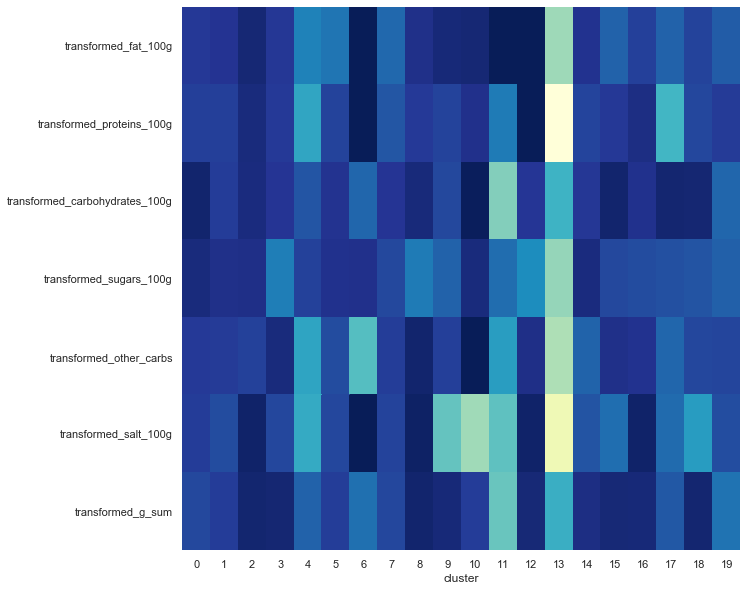

In [19]:
# nutrition_table["category"] = nutrition_table.cluster.map(cluster_names)

plt.figure(figsize=(10,10))
q75 = nutrition_table.groupby("cluster")[transformed_nutrients].quantile(0.75)
q25 = nutrition_table.groupby("cluster")[transformed_nutrients].quantile(0.25)
iqr = q75-q25
sns.heatmap(iqr.transpose(), cmap="YlGnBu_r", cbar=False);

## And some 2D scatter plots of nutirtion facts color coded based on clusters

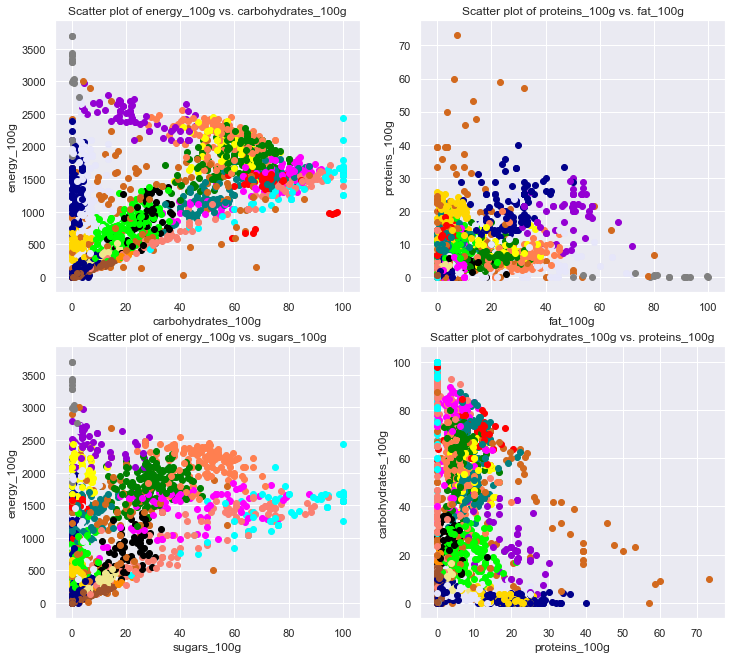

In [20]:
#Create color dictionary for clusters
sample = nutrition_table.sample(2000)
col_dic = {0:'darkblue', 1:'green', 2:'darkorange', 3:'yellow', 4:'magenta',5:'black', 6:'cyan', 7:'lime', 8:'red', 9:'darkviolet',
           10:'grey', 11:'salmon', 12:'sienna', 13:'chocolate', 14:'coral', 15:'gold', 16:'khaki', 17:'lavender',
           18:'navy', 19:'teal'}
colors = [col_dic[x] for x in sample.cluster.values]

# colors = nutrition_table.cluster.values

#Funciton to plot the clusters
def plot_ag_cluster(df, colors):
    fig, ax = plt.subplots(2, 2, figsize=(12,11)) # define plot area         
    x_cols = ['carbohydrates_100g', 'fat_100g', 'sugars_100g', 'proteins_100g']
    y_cols = ['energy_100g', 'proteins_100g', 'energy_100g', 'carbohydrates_100g']
    for x_col,y_col,i,j in zip(x_cols,y_cols,[0,0,1,1],[0,1,0,1]):
        for x, y, c in zip(df[x_col], df[y_col], colors):
            ax[i,j].scatter(x,y, color = c)
        ax[i,j].set_title('Scatter plot of ' + y_col + ' vs. ' + x_col) # Give the plot a main title
        ax[i,j].set_xlabel(x_col) # Set text for the x axis
        ax[i,j].set_ylabel(y_col)# Set text for y axis
    plt.show()
plot_ag_cluster(sample, colors)

## How certain is GMM about cluster assignments

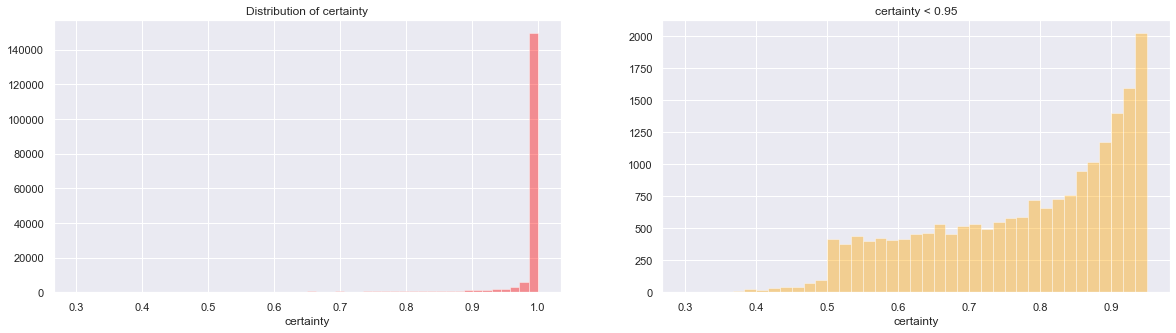

In [21]:
species_probas = model.predict_proba(X_train)
best_species_idx = np.argmax(species_probas,axis=1)

color = np.zeros(best_species_idx.shape[0])
for n in range(len(color)):
    color[n] = np.round(species_probas[n,best_species_idx[n]], 4)
nutrition_table["certainty"] = color
fig, ax = plt.subplots(1,2, figsize = (20,5))
sns.distplot(nutrition_table.certainty, color = "red", ax = ax[0],kde = False)
sns.distplot(nutrition_table.certainty[nutrition_table.certainty < 0.95], color = "orange", kde = False)
ax[0].set_title("Distribution of certainty")
ax[1].set_title("certainty < 0.95");

## Hierarchical clustering of a single product

### We have a lot of products with label "Almond" let's see if we can break them down into smaller clusters

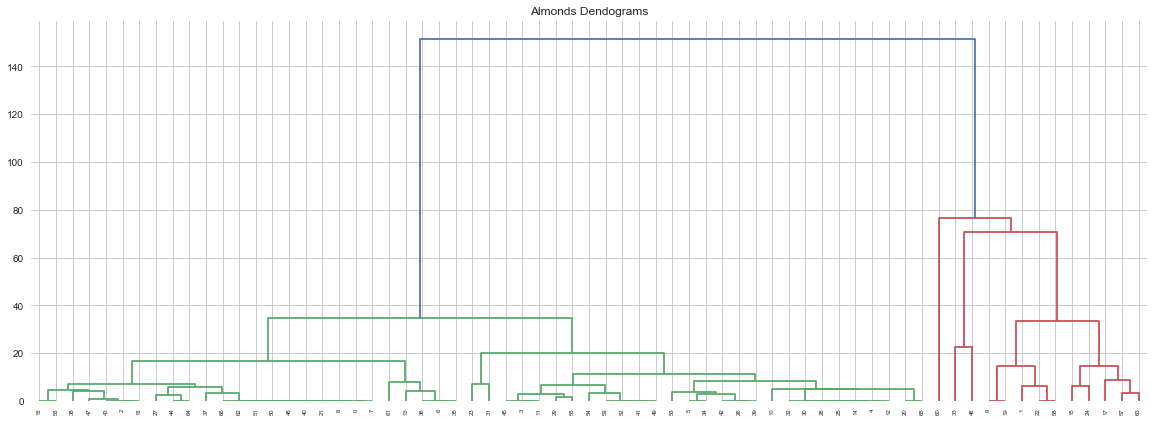

In [43]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

almonds = nutrition_table[nutrition_table["product"] == 'Almonds']
almonds = almonds[["carbohydrates_100g", "proteins_100g", "fat_100g"]]

plt.figure(figsize=(20, 7))
plt.title("Almonds Dendograms")
plt.xticks(rotation='vertical')

dend = shc.dendrogram(shc.linkage(almonds, method='ward'))

### How does the "Almonds" cluster distribution look like?

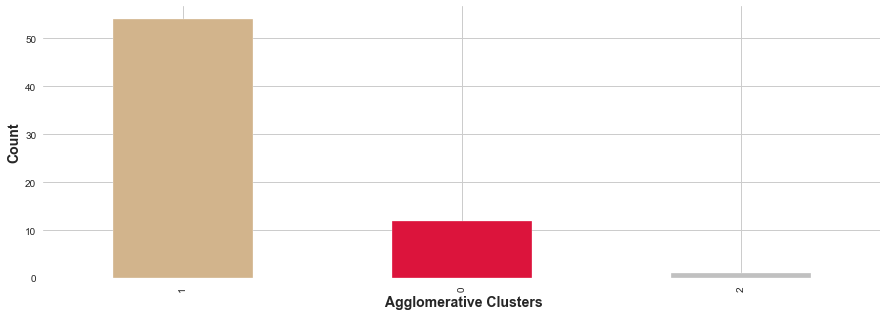

In [44]:
agc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward')
pred_ag = agc.fit_predict(almonds)
almonds['ag_cluster']= agc.fit_predict(almonds)

plt.figure(figsize=(15,5))
plt.style.use('seaborn')
sns.set_style('whitegrid')
almonds['ag_cluster'].value_counts().plot(kind='bar', color=['tan', 'crimson', 'silver'])
plt.ylabel("Count",fontsize=14, weight='bold')
plt.xlabel(' Agglomerative Clusters', fontsize=14, weight='bold')
plt.show()

## Almonds can actually be very different in terms of their nutrition

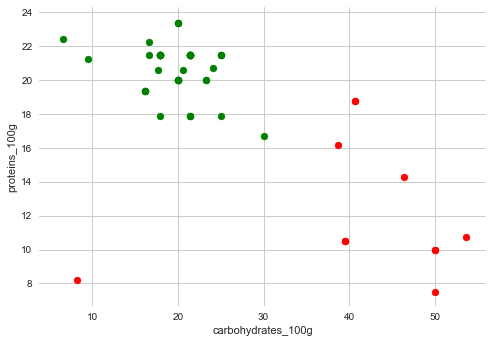

In [50]:
agcluster0=almonds[almonds['ag_cluster']==0]
agcluster1=almonds[almonds['ag_cluster']==1]
agcluster2=almonds[almonds['ag_cluster']==2]

plt.scatter(agcluster0['carbohydrates_100g'], agcluster0['proteins_100g'], color='red')
plt.scatter(agcluster1['carbohydrates_100g'], agcluster1['proteins_100g'], color='green')
plt.xlabel('carbohydrates_100g')
plt.ylabel('proteins_100g')
plt.show()

## We can build a recommendation system to suggest food to users when they need to meet certain nutritions in their diet based on the analysis above